### Importing Libraries

In [13]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd
import seaborn as sns
import statistics
import sort_dataframeby_monthorweek
%matplotlib inline

### Importing Data

In [14]:
turbine_df = pd.read_csv("T1.csv")
turbine_df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


### Data Distribution

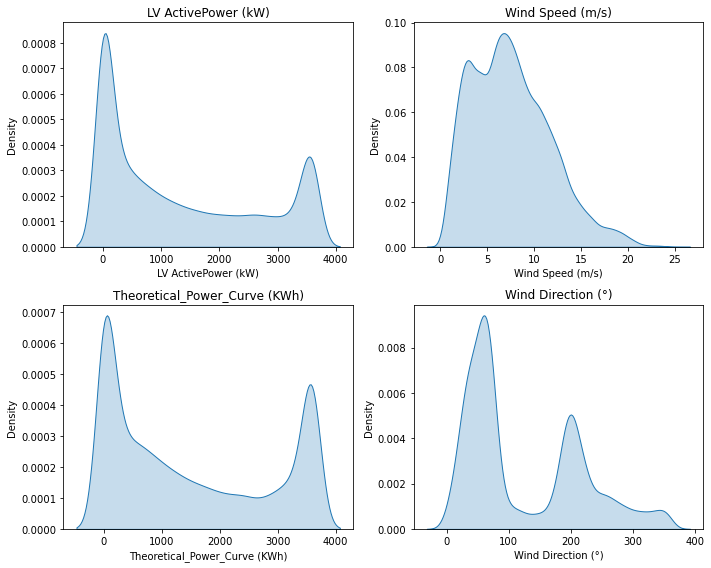

In [15]:
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(turbine_df.iloc[:,i+1], shade=True)
    plt.title(turbine_df.columns[i+1])
plt.tight_layout()
plt.show()

### Renaming the column name (can be easily used in data manipulation)

In [16]:
turbine_df.info()
turbine_df.rename(columns={'Date/Time':'Time'},inplace=True)
turbine_df.rename(columns={'LV ActivePower (kW)':'Active_Power'},inplace=True)
turbine_df.rename(columns={'Wind Speed (m/s)':'Wind_Speed'},inplace=True)
turbine_df.rename(columns={'Theoretical_Power_Curve (KWh)':'Theoretical_Power'},inplace=True)
turbine_df.rename(columns={'Wind Direction (°)':'Wind_Direction'},inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


### Data Correlation with Cumulative Variance

In [17]:
corr_df = turbine_df[['Active_Power','Theoretical_Power','Wind_Speed','Wind_Direction']]
corr_matrix = corr_df.corr()
print(corr_matrix)

from sklearn.decomposition import PCA
my_model = PCA(n_components=4)
my_model.fit_transform(corr_df.values)

print ("Cumulative Variance : ", my_model.explained_variance_ratio_.cumsum()*100)

                   Active_Power  Theoretical_Power  Wind_Speed  Wind_Direction
Active_Power           1.000000           0.949918    0.912774       -0.062702
Theoretical_Power      0.949918           1.000000    0.944209       -0.099076
Wind_Speed             0.912774           0.944209    1.000000       -0.077188
Wind_Direction        -0.062702          -0.099076   -0.077188        1.000000
Cumulative Variance :  [ 97.26561937  99.76275115  99.99994754 100.        ]


### Finding Month and adding into existing data frame

In [18]:
#function for finding months
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"  

In [19]:
#add months
turbine_df['Month']=turbine_df.Time.apply(find_month)
turbine_df.head()

,Time,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction,Month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan


In [20]:
#function for finding day
def find_day(x):
    return x[0]+x[1]

In [21]:
turbine_df['Day']=turbine_df.Time.apply(find_day)
turbine_df.head()

,Time,Active_Power,Wind_Speed,Theoretical_Power,Wind_Direction,Month,Day
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,01
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,01
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,01
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,01
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,01


### Data Cleaning and Removing unncessary columns from Data Frame

In [22]:
del turbine_df['Wind_Speed']
del turbine_df['Wind_Direction']

df_clean = turbine_df.sort_values("Time")
#round the values to 2 digit.
df_clean=df_clean.round({'Active_Power': 2, 'Theoretical_Power': 2})
del df_clean['Time']
df_clean.head()

,Active_Power,Theoretical_Power,Month,Day
0,380.05,416.33,Jan,01
1,453.77,519.92,Jan,01
2,306.38,390.90,Jan,01
3,419.65,516.13,Jan,01
4,380.65,491.70,Jan,01


### Aggregating the data on the basis of month

In [34]:
df_rank = df_clean.groupby(['Month','Day']).agg(['mean', 'std'])
print(df_rank)

          Active_Power              Theoretical_Power             
                  mean          std              mean          std
Month Day                                                         
April 01   2886.696806  1222.431130       3295.837361   686.729962
      02    430.781389   430.817035        953.884861   826.068407
      03     69.036597   108.481952         96.025208   128.655352
      04     15.956573    50.129911         30.466154    71.007393
      05     10.812361    45.971569        171.638194   334.496482
...                ...          ...               ...          ...
Sep   24   1129.070556   948.414924       1316.028750  1068.228300
      25   3170.498194   432.246743       3266.250486   449.110186
      26   3586.202639    38.608988       3593.325347    32.433188
      27   3029.410556   636.854799       3123.455556   656.059917
      28   2101.737674  1167.170432       2283.477442  1216.281549

[356 rows x 4 columns]


### Selecting Monthly Mean data of Active Power and Theoretical Power in separate DF

In [66]:
months = ['Jan','Feb','March','April','May','June','July','August','Sep','Oct','Nov','Dec']
for m in months:
    df = df_clean.loc[df_clean['Month'] == m].groupby('Day')['Active_Power'].mean()
    df.to_csv('active_'+m+'_mean.csv')
    df_theo = df_clean.loc[df_clean['Month'] == m].groupby('Day')['Theoretical_Power'].mean()
    df_theo.to_csv('theoretical_power_'+m+'_mean.csv')

### Construction of Control Charts for every month

In [74]:
def control_chart(df_active, df_theo):
    month_dict = {}
    data_active = df_active.rename(columns={'Active_Power':"x"})
    x_theo = pd.Series(df_theo['Theoretical_Power']).to_numpy()
    MR = []
    for data in range(1, len(x_theo)):
        MR.append(abs(x_theo[data] - x_theo[data-1]))
    MR = np.array(MR)

    CL = x_theo.mean()
    UCL = x_theo.mean() + 3*(MR.mean())/1.128
    LCL = x_theo.mean() - 3*(MR.mean())/1.128
    
    month_dict['data'] = data_active
    month_dict['CL'] = CL
    month_dict['UCL'] = UCL
    month_dict['LCL'] = LCL
    return month_dict

In [75]:
chart_monthly_data = {}
for m in months:
    df_active = pd.read_csv('active_'+m+'_mean.csv')
    df_theo = pd.read_csv('theoretical_power_'+m+'_mean.csv')
    chart_monthly_data[m] = control_chart(df_active, df_theo)

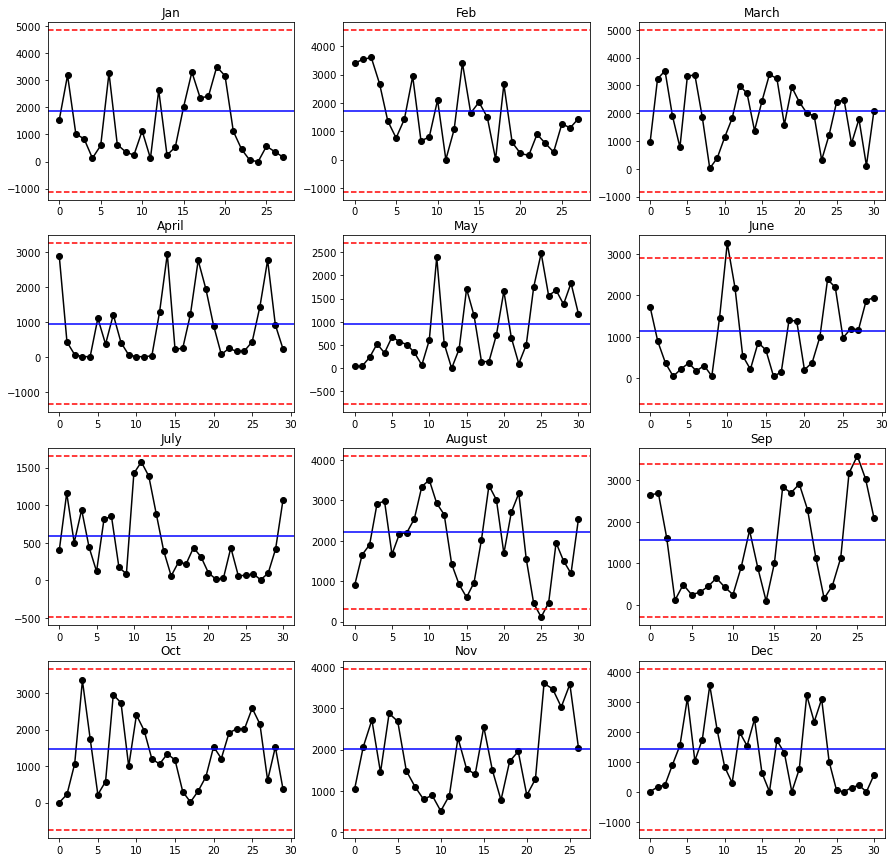

In [76]:
i=1
plt.figure(figsize=(15,15))
for m in months:
    plt.subplot(4,3,i)
    plt.plot(chart_monthly_data[m]['data']['x'], linestyle='-', marker='o', color='black')
    plt.axhline(chart_monthly_data[m]['CL'], color='blue')
    plt.axhline(chart_monthly_data[m]['UCL'], color = 'red', linestyle = 'dashed')
    plt.axhline(chart_monthly_data[m]['LCL'], color = 'red', linestyle = 'dashed')
    plt.title(m)
    plt.xlabel='Days'
    plt.ylabel='Active Power'
    i += 1

### Validating the points out of control

In [77]:
# x chart
for m in months:
    i = 1
    control = True
    print(m+": ")
    for unit in chart_monthly_data[m]['data']['x']:
        if unit > chart_monthly_data[m]['UCL'] or unit < chart_monthly_data[m]['LCL']:
            print('Day', i, 'out of cotrol limits!')
            control = False
        i += 1
    if control == True:
        print('All points within Theoretical Power control limits.')


Jan: 
All points within Theoretical Power control limits.
Feb: 
All points within Theoretical Power control limits.
March: 
All points within Theoretical Power control limits.
April: 
All points within Theoretical Power control limits.
May: 
All points within Theoretical Power control limits.
June: 
Day 11 out of cotrol limits!
July: 
All points within Theoretical Power control limits.
August: 
Day 26 out of cotrol limits!
Sep: 
Day 26 out of cotrol limits!
Oct: 
All points within Theoretical Power control limits.
Nov: 
All points within Theoretical Power control limits.
Dec: 
All points within Theoretical Power control limits.


### Removing out of control points and recalculating the control limits

In [78]:
new_chart_monthly_data = {}
for m in months:
    df_active = pd.read_csv('active_'+m+'_mean.csv')
    df_theo = pd.read_csv('theoretical_power_'+m+'_mean.csv')
    if m == 'June':
        df_active.drop(df_active[df_active['Day'] == 11].index, inplace = True)
        df_theo.drop(df_theo[df_theo['Day'] == 11].index, inplace = True)
    if m in ['August','Sep']:
        df_active.drop(df_active[df_active['Day'] == 26].index, inplace = True)
        df_theo.drop(df_theo[df_theo['Day'] == 26].index, inplace = True)
    new_chart_monthly_data[m] = control_chart(df_active, df_theo)

### Plotting Control Charts with new points (after removing the out of control points)

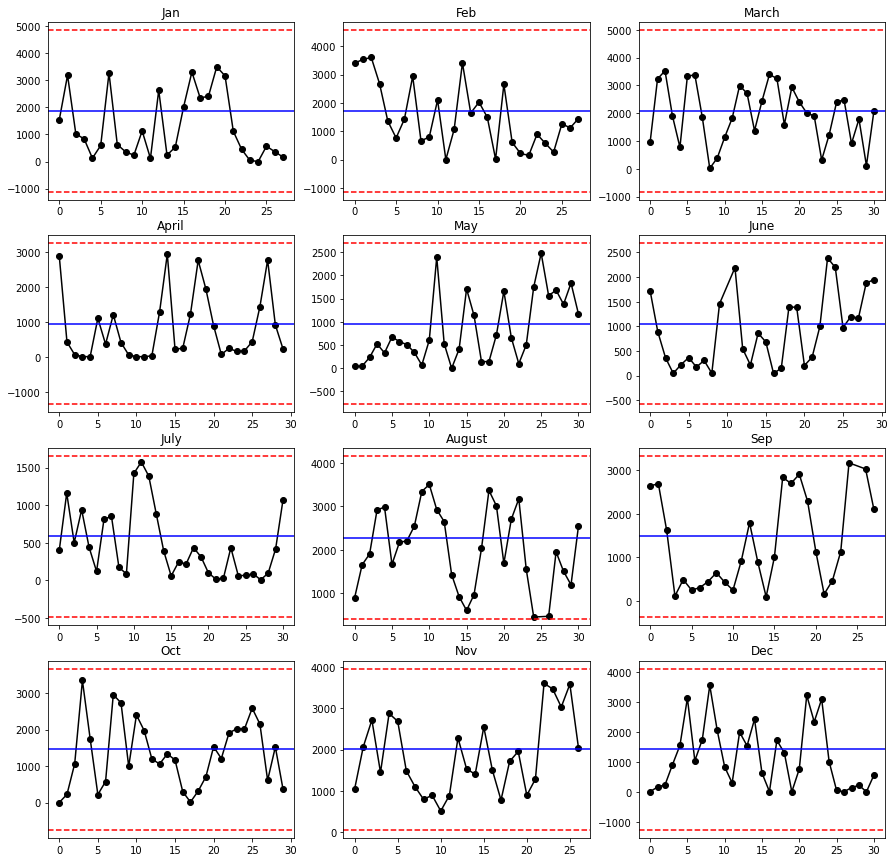

In [79]:
i=1
plt.figure(figsize=(15,15))
for m in months:
    plt.subplot(4,3,i)
    plt.plot(new_chart_monthly_data[m]['data']['x'], linestyle='-', marker='o', color='black')
    plt.axhline(new_chart_monthly_data[m]['CL'], color='blue')
    plt.axhline(new_chart_monthly_data[m]['UCL'], color = 'red', linestyle = 'dashed')
    plt.axhline(new_chart_monthly_data[m]['LCL'], color = 'red', linestyle = 'dashed')
    plt.title(m)
    plt.xlabel='Days'
    plt.ylabel='Active Power'
    i += 1

### Again Validating the points out of control

In [80]:
# x chart
for m in months:
    i = 1
    control = True
    print(m+": ")
    for unit in new_chart_monthly_data[m]['data']['x']:
        if unit > new_chart_monthly_data[m]['UCL'] or unit < new_chart_monthly_data[m]['LCL']:
            print('Day', i, 'out of cotrol limits!')
            control = False
        i += 1
    if control == True:
        print('All points within Theoretical Power control limits.')

Jan: 
All points within Theoretical Power control limits.
Feb: 
All points within Theoretical Power control limits.
March: 
All points within Theoretical Power control limits.
April: 
All points within Theoretical Power control limits.
May: 
All points within Theoretical Power control limits.
June: 
All points within Theoretical Power control limits.
July: 
All points within Theoretical Power control limits.
August: 
All points within Theoretical Power control limits.
Sep: 
All points within Theoretical Power control limits.
Oct: 
All points within Theoretical Power control limits.
Nov: 
All points within Theoretical Power control limits.
Dec: 
All points within Theoretical Power control limits.


### Now, all points are in control limits !